In [6]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [7]:
topics = np.array([[-1, 1]])

In [8]:
varied_param = 'num_agents'
varied_param_legend_label = 'Agents'
varied_param_x_label = 'Number of Consumer/Producer Agents'

In [9]:
num_influencers = 1
num_agents = [1, 5, 10, 20, 30]
#num_agents = [1, 5, 10, 20, 50]

varied_param_values = num_agents

In [10]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    agent_topic_interest_func=None,
    consumer_attention_bound=10,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=20,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=True,
)

Optimizing consumer 0
Optimizing influencer 1
Optimizing producer 0
Optimization succeeded (overall 0.0007050830172374845s): nit=0, nfev=2, njev=1.
Iteration 0 / 100 done in 0.00799437501700595 seconds.
Total Social Welfare: 2.7145122541078788
Optimizing consumer 0
Optimizing influencer 1
Optimizing producer 0
Optimization succeeded (overall 0.00047091697342693806s): nit=0, nfev=2, njev=1.
Iteration 1 / 100 done in 0.002902209002058953 seconds.
Total Social Welfare: 2.7145122541078788
Consumer rate change: 0.0
Consumer utility change: 0.0%
Influencer rate change: 0.0
Influencer utility change: 0.0%
Producer topic change: 0.0
Producer utility change: 0.0%
Converged. Optimization took 0.011531250027474016 seconds.
Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing influencer 5
Optimizing producer 0
Optimization succeeded (overall 0.0016666669980622828s): nit=3, nfev=10, njev=5.
Optimizing producer 1
Optimization succee

Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.018013124994467944s): nit=4, nfev=12, njev=6.
Optimizing producer 1
Optimization succeeded (overall 0.011819667008239776s): nit=4, nfev=12, njev=6.
Optimizing producer 2
Optimization succeeded (overall 0.004156665992923081s): nit=3, nfev=10, njev=5.
Optimizing producer 3
Optimization succeeded (overall 0.0031228329753503203s): nit=3, nfev=10, njev=5.
Optimizing producer 4
Optimization succeeded (overall 0.00467054097680375s): nit=2, nfev=8, njev=4.
Optimizing producer 5
Optimization succeeded (overall 0.008848708006553352s): nit=2, nfev=8, njev=4.
Optimizing producer 6
Optimization succeeded (overall 0.003378041961695999s): nit=3, nfev=10, njev=5.
Optimizing producer 7
Optimization succeeded (overall 0.0031692080083303154s): nit=3, nfev=10, njev=5.
Optimizing producer 8
Optimi

In [11]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

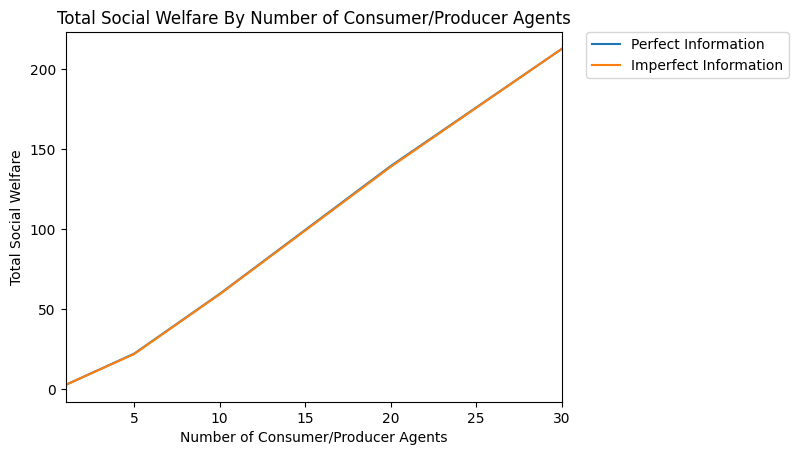

In [12]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

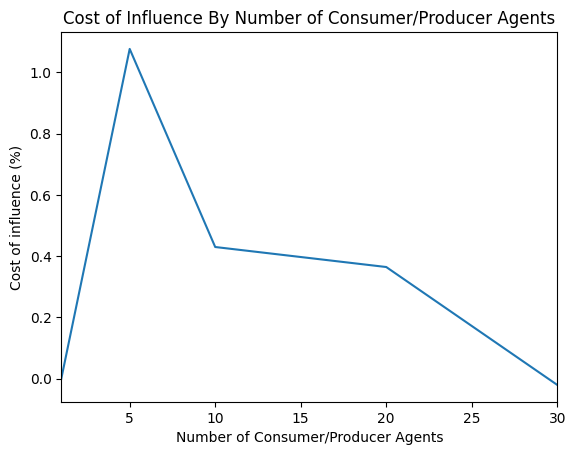

In [13]:
visualize.plot_cost_of_influence_by_test(f"Cost of Influence By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, varied_param_values, varied_param_x_label, 'Cost of Influence')

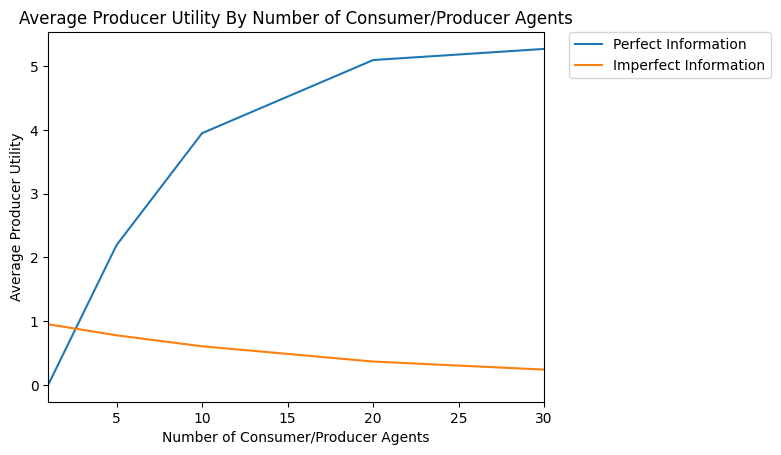

In [14]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

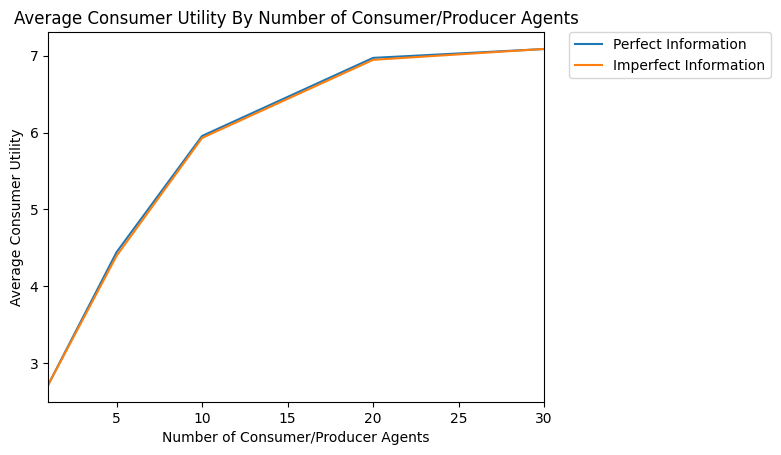

In [15]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

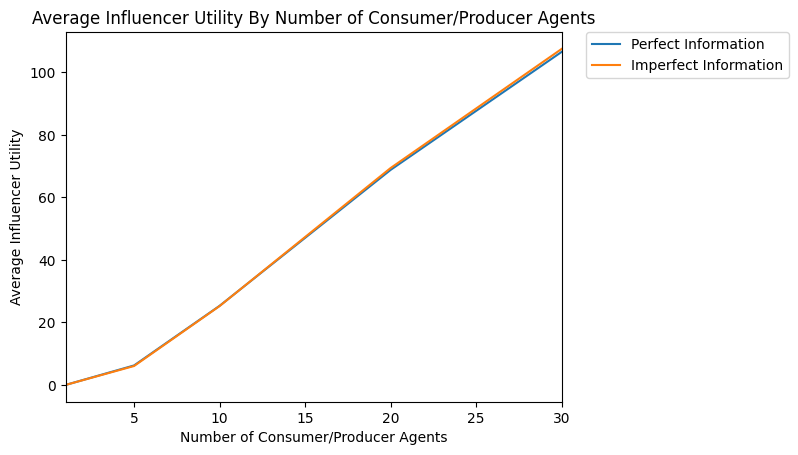

In [16]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

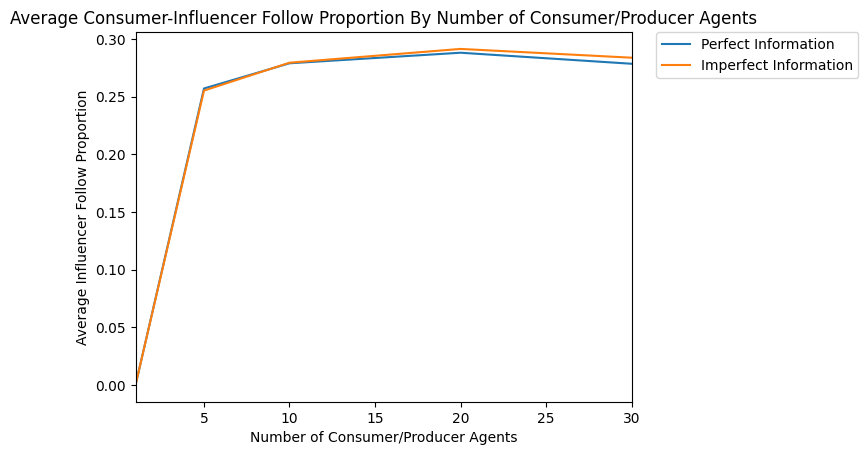

In [17]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

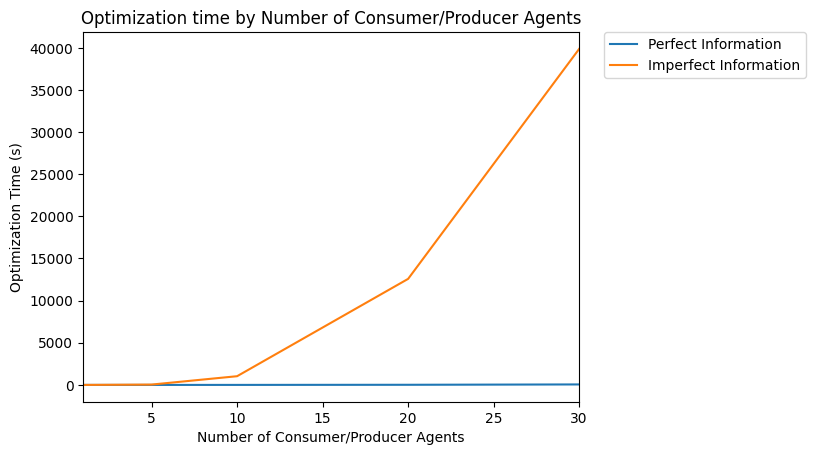

In [18]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

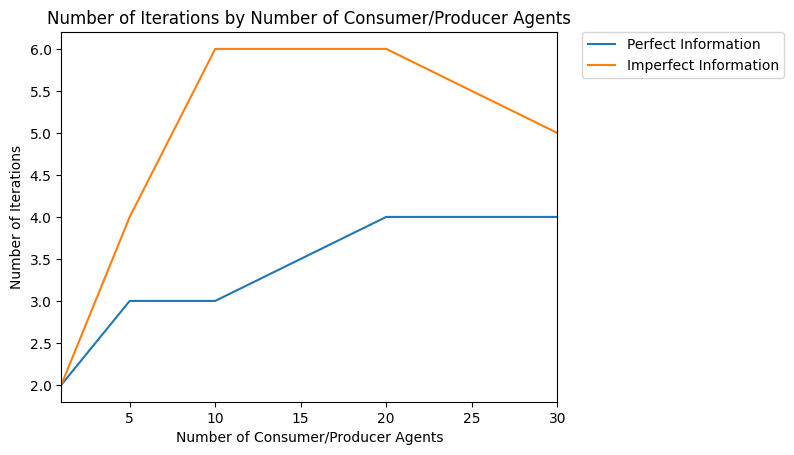

In [19]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

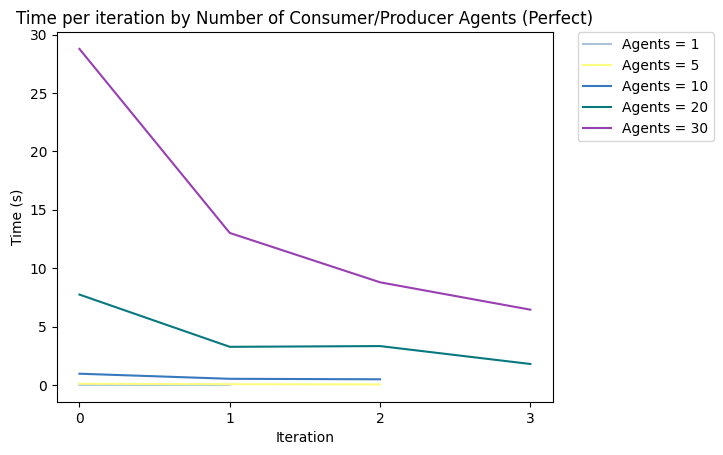

In [20]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

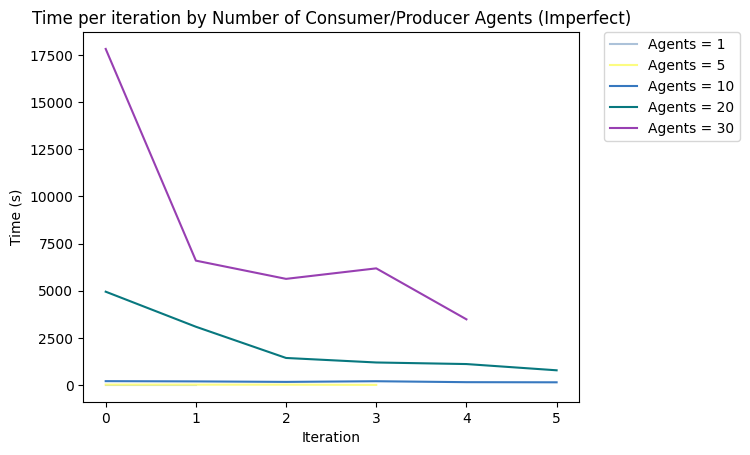

In [21]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Imperfect)", imperfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

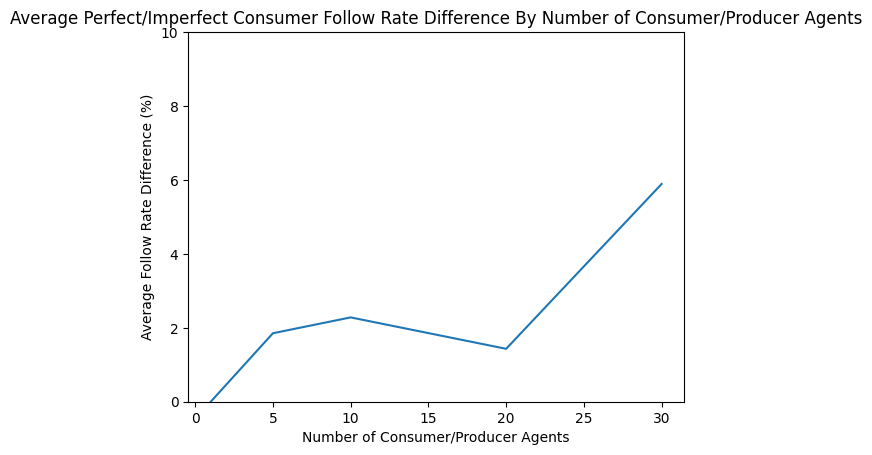

In [29]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.consumer_stats:
        perfect_consumer_stat = perfect_stat.consumer_stats[index]
        imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1]) / np.linalg.norm(perfect_consumer_stat.following_rates[-1]) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Perfect/Imperfect Consumer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.ylim(0, 10)
plt.show()

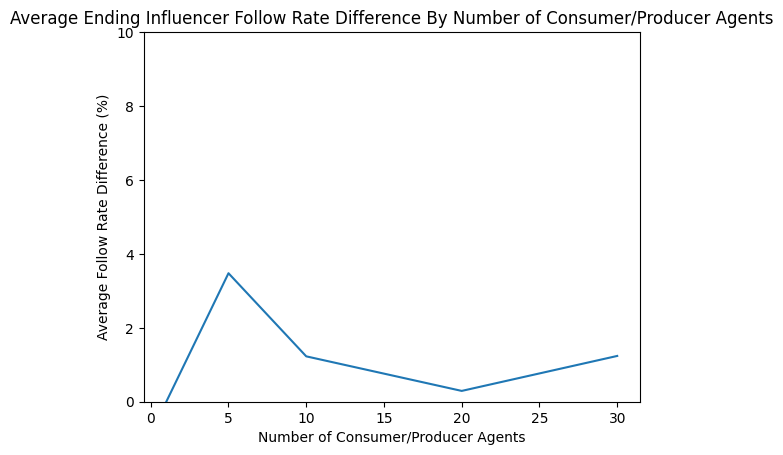

In [30]:
avg_follow_rate_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_follow_rate_diff = 0

    for index in perfect_stat.influencer_stats:
        perfect_influencer_stat = perfect_stat.influencer_stats[index]
        imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

        ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1]) / np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * 100
        avg_follow_rate_diff += ending_follow_rate_diff
    
    avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
    avg_follow_rate_diffs.append(avg_follow_rate_diff)

plt.figure()
plt.title(f"Average Ending Influencer Follow Rate Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Follow Rate Difference (%)")
plt.plot(varied_param_values, avg_follow_rate_diffs)
plt.ylim(0, 10)
plt.show()

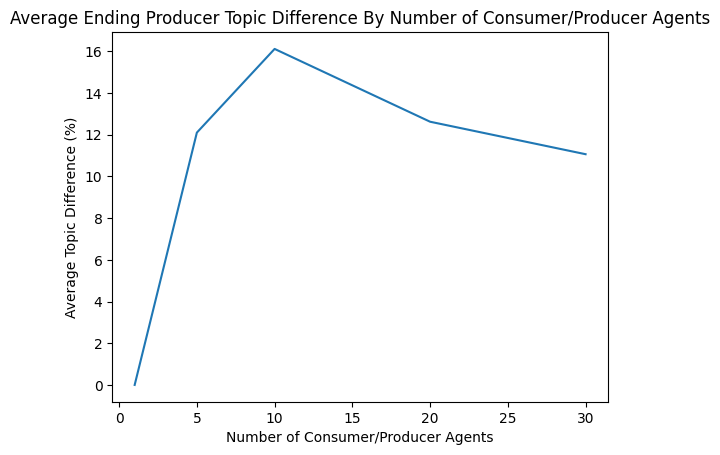

In [24]:
avg_topic_diffs = []

for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    imperfect_stat: TestStats = imperfect_info_stats[i]

    avg_topic_diff = 0

    for index in perfect_stat.producer_stats:
        perfect_producer_stat = perfect_stat.producer_stats[index]
        imperfect_producer_stat = imperfect_stat.producer_stats[index]

        if perfect_producer_stat.topics[-1] == 0:
            continue

        ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1]) / (np.linalg.norm(perfect_producer_stat.topics[-1]) + 1e-8) * 100
        avg_topic_diff += ending_topic_diff
    
    avg_topic_diff /= len(perfect_stat.producer_stats)
    avg_topic_diffs.append(avg_topic_diff)

plt.figure()
plt.title(f"Average Ending Producer Topic Difference By {varied_param_x_label}")
plt.xlabel(varied_param_x_label)
plt.ylabel("Average Topic Difference (%)")
plt.plot(varied_param_values, avg_topic_diffs)
plt.show()

In [ ]:
visualize.plot_ending_value_by_test(f"Producer Topic Standard Deviation By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'producer_topic_standard_deviation', varied_param_values, varied_param_x_label, 'Producer Topic Standard Deviation')

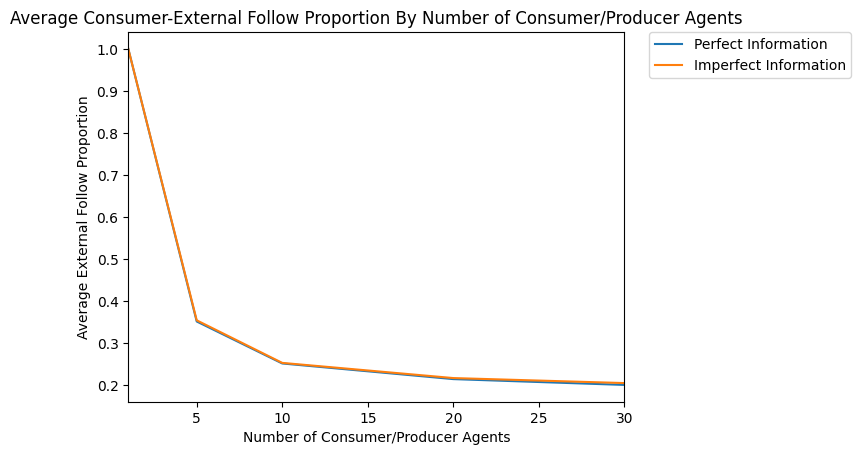

In [25]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

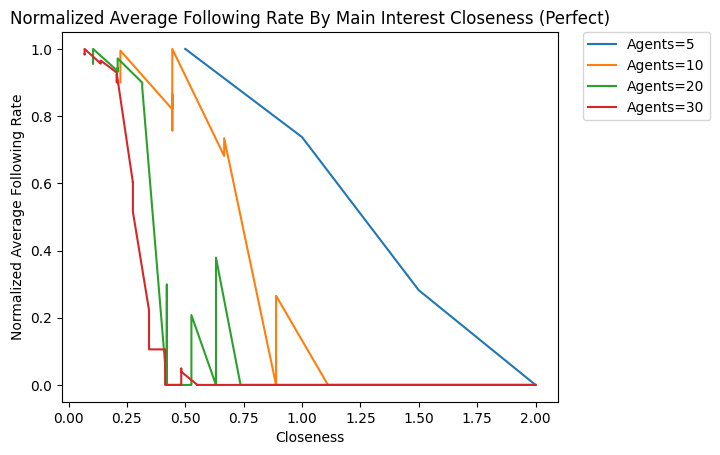

In [26]:
plt.figure()
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_rate_by_main_interest_closeness = perfect_stat.average_following_rate_by_main_interest_closeness
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}")
plt.title(f"Normalized Average Following Rate By Main Interest Closeness (Perfect)")
plt.xlabel("Closeness")
plt.ylabel("Normalized Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [27]:
#for i in range(num_agents):
    #visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

In [28]:
for i in range(num_agents):
    #visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in imperfect_info_stats], varied_param_legend_label, varied_param_values)

SyntaxError: incomplete input (299256253.py, line 2)

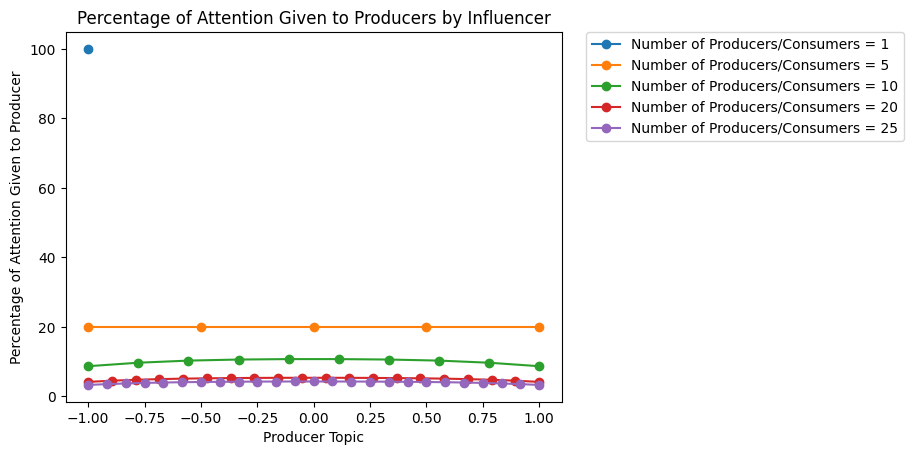

In [ ]:
#visualize.plot_agent_following_rates_by_test(num_agents, [stat.influencer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

for num, stat in zip(num_agents, perfect_info_stats):
    influencer_ind = num
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'Number of Producers/Consumers = {num}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

1 [100.   0.   0.]
5 [20. 20. 20. 20. 20.  0.  0.]
10 [ 8.68430381  9.68807146 10.29727782 10.60170771 10.72865909 10.72860747
 10.60173424 10.29729477  9.68806057  8.68428306  0.          0.        ]
20 [4.16837973 4.51346406 4.77659372 4.96838553 5.10497366 5.20036538
 5.26679787 5.31123482 5.33872213 5.35109102 5.35108075 5.33873007
 5.31125186 5.26679787 5.20035386 5.10494698 4.96837989 4.77661498
 4.51343796 4.16839785 0.         0.        ]
25 [3.2966966  3.53139328 3.72254953 3.87279282 3.98858633 4.07615289
 4.14214261 4.19158271 4.22805351 4.25420531 4.27177459 4.28179315
 4.2845182  4.28178685 4.27176534 4.25421352 4.22806765 4.19159022
 4.14215702 4.07614512 3.98859063 3.87280379 3.72254813 3.53138876
 3.29670142 0.         0.        ]


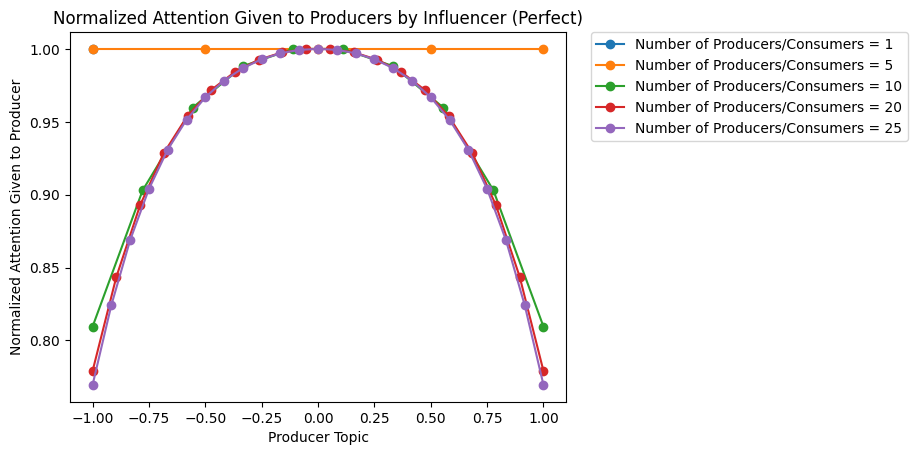

In [ ]:
for num, stat in zip(num_agents, perfect_info_stats):
    influencer_ind = num
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    print(num, following_rates)
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'Number of Producers/Consumers = {num}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

1 [100.   0.   0.]
5 [20. 20. 20. 20. 20.  0.  0.]
10 [ 8.12130267  9.70092064 10.4447932  10.79474778 10.93820245 10.93818684
 10.79481171 10.44486417  9.70085459  8.12131595  0.          0.        ]
20 [4.1748     4.46130233 4.78577243 4.97548943 5.11282281 5.20806699
 5.27603687 5.32243768 5.34977655 5.36247016 5.36247328 5.34977288
 5.32141271 5.27521397 5.20528027 5.11565429 4.94915015 4.72018973
 4.49725955 4.17461792 0.         0.        ]
25 [3.29502795 3.53167913 3.72606978 3.87584539 3.99236138 4.07767932
 4.14729849 4.19701357 4.23358972 4.25914497 4.27675209 4.28758953
 4.29036307 4.28747359 4.27694164 4.25897545 4.23250677 4.19671045
 4.14145698 4.07000224 3.97259639 3.86443581 3.72338649 3.53359176
 3.25150802 0.         0.        ]


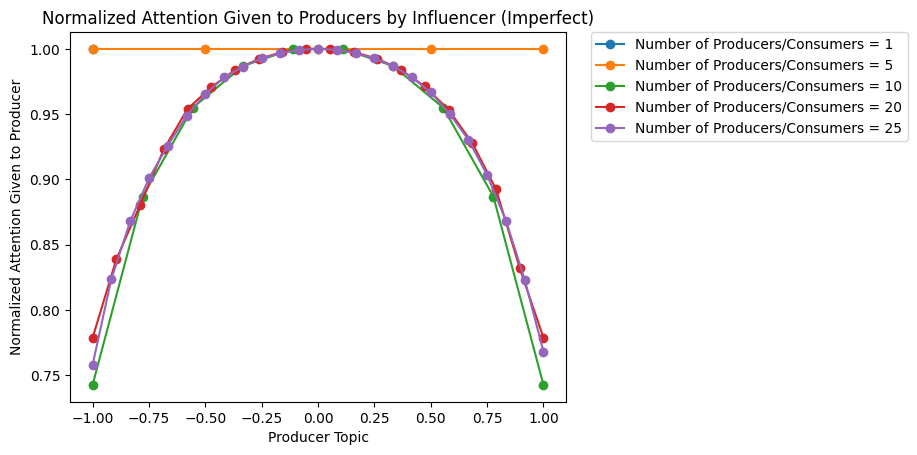

In [ ]:
for num, stat in zip(num_agents, imperfect_info_stats):
    influencer_ind = num
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    print(num, following_rates)
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'Number of Producers/Consumers = {num}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Imperfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

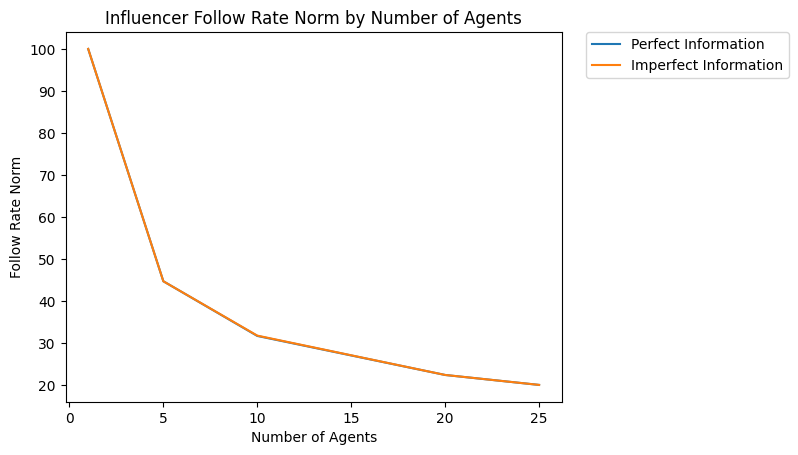

In [ ]:
perf_norms = []
imperf_norms = []
for num, perf_stat, imperf_stat in zip(num_agents, perfect_info_stats, imperfect_info_stats):
    influencer_ind = num
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(following_rates)
    perf_norms.append(perf_norm)

    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(following_rates)
    imperf_norms.append(imperf_norm)

plt.plot(num_agents, perf_norms, label='Perfect Information')
plt.plot(num_agents, imperf_norms, label='Imperfect Information')
plt.title(f"Influencer Follow Rate Norm by Number of Agents")
plt.xlabel("Number of Agents")
plt.ylabel("Follow Rate Norm")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

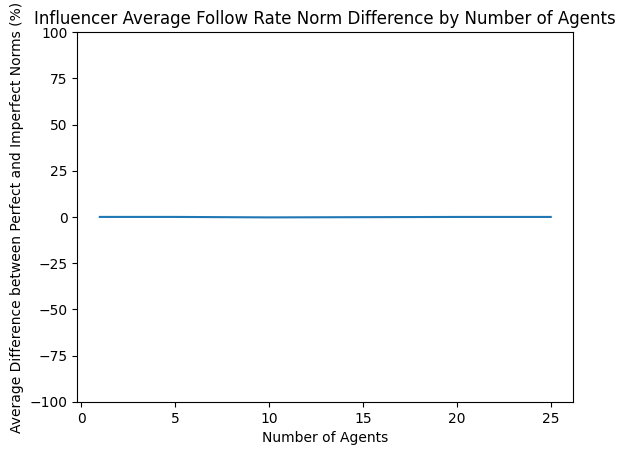

In [ ]:
difference_of_norms = []
for num, perf_stat, imperf_stat in zip(num_agents, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    influencer_ind = num
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    perf_norm = np.linalg.norm(perf_following_rates)
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    imperf_norm = np.linalg.norm(imperf_following_rates)
    avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.influencer_stats)
    difference_of_norms.append(avg_difference_of_norms)

plt.plot(num_agents, difference_of_norms)
plt.title(f"Influencer Average Follow Rate Norm Difference by Number of Agents")
plt.xlabel("Number of Agents")
plt.ylabel("Average Difference between Perfect and Imperfect Norms (%)")
plt.ylim(-100, 100)
plt.show()

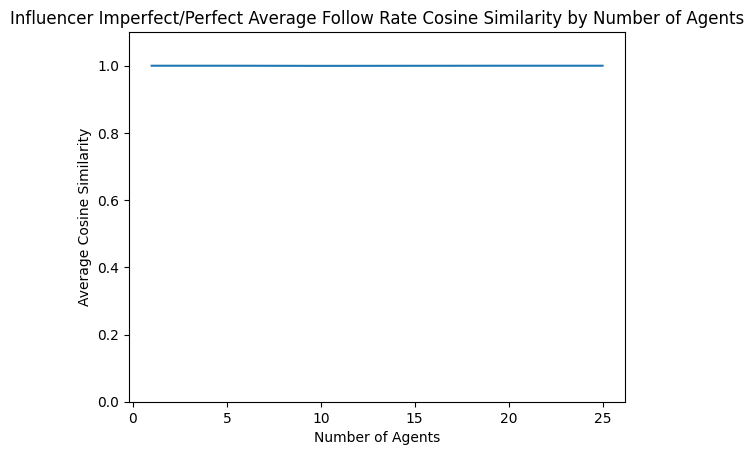

In [ ]:
cosine_similarities = []
for num, perf_stat, imperf_stat in zip(num_agents, perfect_info_stats, imperfect_info_stats):
    avg_cosine_similarity = 0
    influencer_ind = num
    perfect_influencer_stat = perf_stat.influencer_stats[influencer_ind]
    perf_following_rates = perfect_influencer_stat.following_rates[-1]
    imperfect_influencer_stat = imperf_stat.influencer_stats[influencer_ind]
    imperf_following_rates = imperfect_influencer_stat.following_rates[-1]
    avg_cosine_similarity += np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    avg_cosine_similarity /= len(perf_stat.influencer_stats)
    cosine_similarities.append(avg_cosine_similarity)

plt.plot(num_agents, cosine_similarities)
plt.title(f"Influencer Imperfect/Perfect Average Follow Rate Cosine Similarity by Number of Agents")
plt.xlabel("Number of Agents")
plt.ylabel("Average Cosine Similarity")
plt.ylim(0, 1.1)
plt.show()

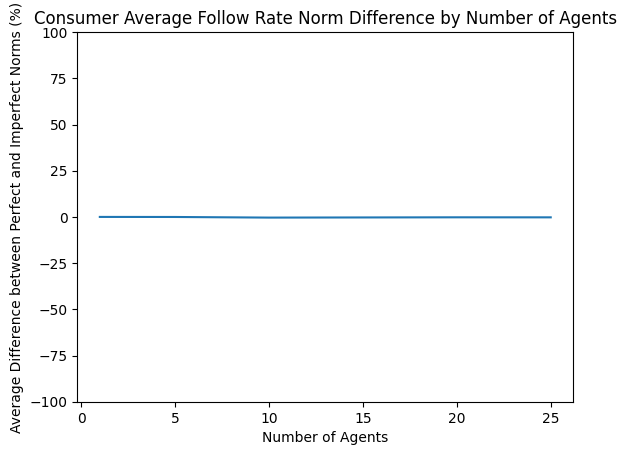

In [ ]:
difference_of_norms = []
for num, perf_stat, imperf_stat in zip(num_agents, perfect_info_stats, imperfect_info_stats):
    avg_difference_of_norms = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        perf_norm = np.linalg.norm(perf_following_rates)
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        imperf_norm = np.linalg.norm(imperf_following_rates)
        avg_difference_of_norms += (perf_norm - imperf_norm) / perf_norm * 100
    avg_difference_of_norms /= len(perf_stat.consumer_stats)

    difference_of_norms.append(avg_difference_of_norms)

plt.plot(num_agents, difference_of_norms)
plt.title(f"Consumer Average Follow Rate Norm Difference by Number of Agents")
plt.xlabel("Number of Agents")
plt.ylabel("Average Difference between Perfect and Imperfect Norms (%)")
plt.ylim(-100, 100)
plt.show()

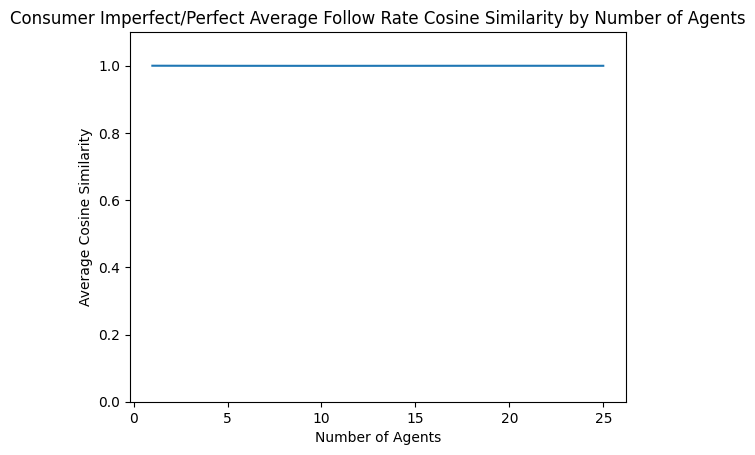

In [ ]:
cosine_similarities = []
for num, perf_stat, imperf_stat in zip(num_agents, perfect_info_stats, imperfect_info_stats):
    avg_cosine_similarity = 0
    for consumer_ind in perf_stat.consumer_stats:
        perfect_consumer_stat = perf_stat.consumer_stats[consumer_ind]
        perf_following_rates = perfect_consumer_stat.following_rates[-1]
        imperfect_consumer_stat = imperf_stat.consumer_stats[consumer_ind]
        imperf_following_rates = imperfect_consumer_stat.following_rates[-1]
        avg_cosine_similarity += np.dot(perf_following_rates, imperf_following_rates) / (np.linalg.norm(perf_following_rates) * np.linalg.norm(imperf_following_rates))
    avg_cosine_similarity /= len(perf_stat.consumer_stats)
    cosine_similarities.append(avg_cosine_similarity)

plt.plot(num_agents, cosine_similarities)
plt.title(f"Consumer Imperfect/Perfect Average Follow Rate Cosine Similarity by Number of Agents")
plt.xlabel("Number of Agents")
plt.ylabel("Average Cosine Similarity")
plt.ylim(0, 1.1)
plt.show()

In [ ]:
for stat in perfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 2, 'total_consumer_utility': [0, 2.7145122541078788, 2.7145122541078788], 'total_producer_utility': [0, 0, 0], 'total_influencer_utility': [0, 0, 0], 'total_social_welfare': [0, 2.7145122541078788, 2.7145122541078788], 'average_consumer_rate_change': [0, 7.071067811865476, 0.0], 'average_producer_topic_change': [0, 0.0, 0.0], 'average_influencer_rate_change': [0, 0.0, 0.0], 'average_consumer_utility_change': [0, 2.7145122541078788, 0.0], 'average_producer_utility_change': [0, 0.0, 0.0], 'average_influencer_utility_change': [0, 0.0, 0.0], 'consumer_stats': {0: {'utilities': [0, 2.7145122541078788, 2.7145122541078788], 'utility_change': [0, 2.7145122541078788, 0.0], 'optimization_times': [0.0028484170034062117, 0.0018235839961562306], 'following_rates': [array([0., 5., 5.]), array([ 0.,  0., 10.]), array([ 0.,  0., 10.])], 'attention_used': [10.0, 10.000000000000002, 10.000000000000002], 'rate_change': [0, 7.071067811865476, 0.0]}}, 'producer_stats': {0: {'utilities': 

In [ ]:
for stat in imperfect_info_stats:
    print(stat.to_dict())

{'num_iterations': 2, 'total_consumer_utility': [0, 2.7145122541078788, 2.7145122541078788], 'total_producer_utility': [0, 0.951229424500714, 0.951229424500714], 'total_influencer_utility': [0, 0, 0], 'total_social_welfare': [0, 3.665741678608593, 3.665741678608593], 'average_consumer_rate_change': [0, 7.071067811865476, 0.0], 'average_producer_topic_change': [0, 0.0, 0.0], 'average_influencer_rate_change': [0, 0.0, 0.0], 'average_consumer_utility_change': [0, 2.7145122541078788, 0.0], 'average_producer_utility_change': [0, 0.951229424500714, 0.0], 'average_influencer_utility_change': [0, 0.0, 0.0], 'consumer_stats': {0: {'utilities': [0, 2.7145122541078788, 2.7145122541078788], 'utility_change': [0, 2.7145122541078788, 0.0], 'optimization_times': [0.001140666994615458, 0.00029108299349900335], 'following_rates': [array([0., 5., 5.]), array([ 0.,  0., 10.]), array([ 0.,  0., 10.])], 'attention_used': [10.0, 10.000000000000002, 10.000000000000002], 'rate_change': [0, 7.071067811865476, 